In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Price"]=data.target

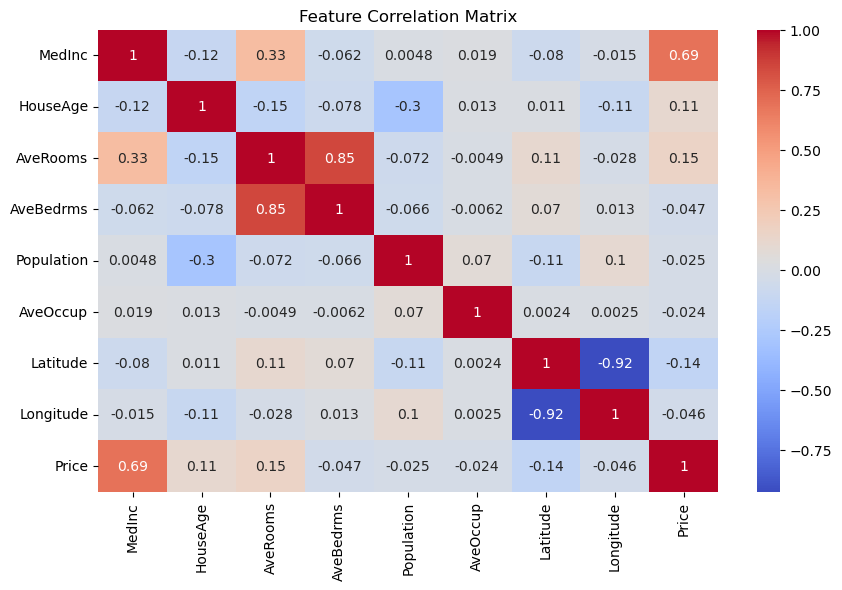

In [3]:
#Feature Selection using correlation analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [4]:
#Top 5 featuers based on correlation analysis
selected_features = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population"]
x = df[selected_features]
y=df["Price"]

In [5]:
#Standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
#Polynomial features
polynomial = PolynomialFeatures(degree=2, include_bias=False)
x_polynomial = polynomial.fit_transform(x_scaled)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_polynomial, y, test_size=0.2, random_state=42)

In [8]:
#Model training with Cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring="r2")
print(f"Cross Validation R^2 scores: {cv_scores}")
print(f"Average R^2 scores: {cv_scores.mean():.4f}")

Cross Validation R^2 scores: [0.58277182 0.58471902 0.57407893 0.29739263 0.58388862]
Average R^2 scores: 0.5246


In [9]:
#Hypermater tuning - Gridsearchcv
parameter = {"fit_intercept": [True, False]}
search = GridSearchCV(LinearRegression(), parameter, cv=5, scoring="r2")
search.fit(x_train, y_train)
best_model = search.best_estimator_

In [10]:
best_model.fit(x_train, y_train)

LinearRegression()

In [11]:
#Predictions
y_pred = best_model.predict(x_test)

In [12]:
#Evaluations
meaner = mean_absolute_error(y_test, y_pred)
meansq = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [13]:
#Results and Visualizations
print(f"Best Model parameters: {search.best_params_}")
print(f"Mean absolute error: {meaner:.4f}, Mean squared error: {meansq:.4f}, R^2 score: {r2:.4f}")

Best Model parameters: {'fit_intercept': True}
Mean absolute error: 0.5584, Mean squared error: 0.7018, R^2 score: 0.4645


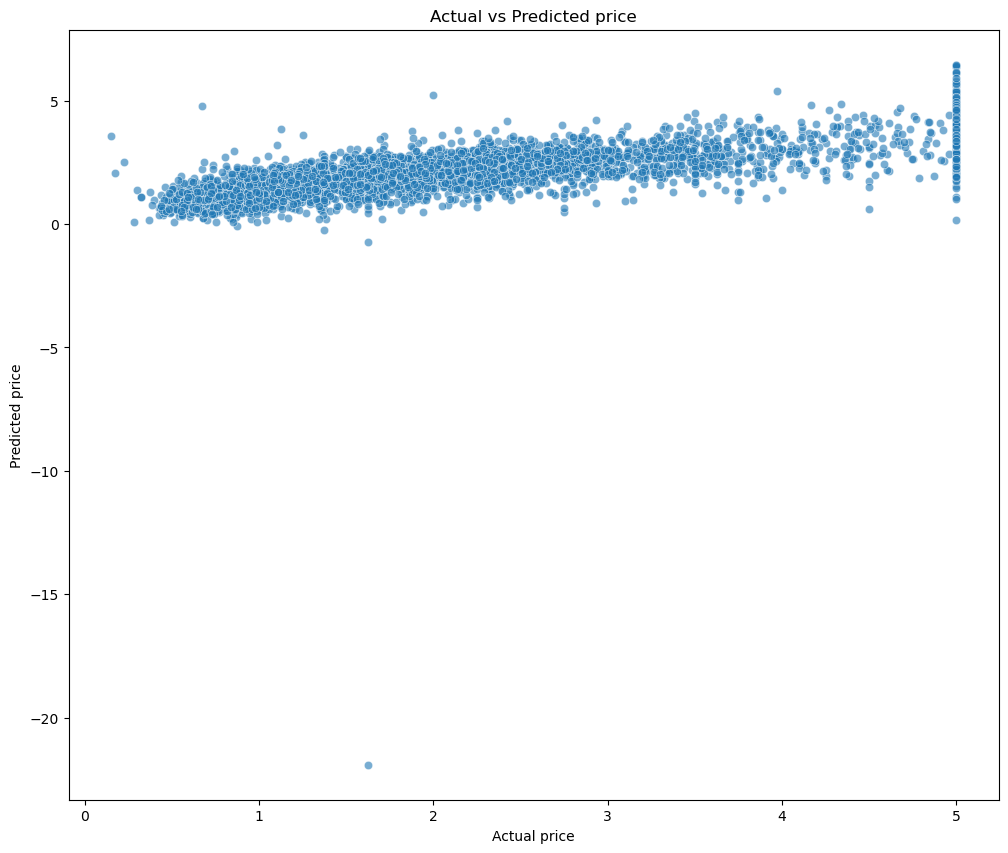

In [14]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs Predicted price")
plt.show()

In [15]:
#Model coeffiecent and Intercepts
feature_names = polynomial.get_feature_names_out(selected_features)
print("Model Coefficients:")
for feature, coef in zip(feature_names, best_model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {best_model.intercept_:.4f}")

Model Coefficients:
MedInc: 1.2632
HouseAge: 0.2105
AveRooms: -0.8123
AveBedrms: 0.8448
Population: -0.0042
MedInc^2: -0.1379
MedInc HouseAge: 0.0865
MedInc AveRooms: 0.2172
MedInc AveBedrms: -0.2010
MedInc Population: 0.1235
HouseAge^2: 0.0402
HouseAge AveRooms: -0.0832
HouseAge AveBedrms: 0.0792
HouseAge Population: 0.0170
AveRooms^2: 0.0211
AveRooms AveBedrms: -0.0046
AveRooms Population: -0.2003
AveBedrms^2: -0.0141
AveBedrms Population: 0.2888
Population^2: 0.0051

Intercept: 2.0855
